In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#Models to be examiened 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Model Evalution metrics

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score 
from sklearn.metrics import confusion_matrix , classification_report, precision_score , recall_score , f1_score , plot_roc_curve 

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sikitlearn/titanic/train.csv') 
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sikitlearn/titanic/test.csv')

#**EDA**

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
len(train_df)

891

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


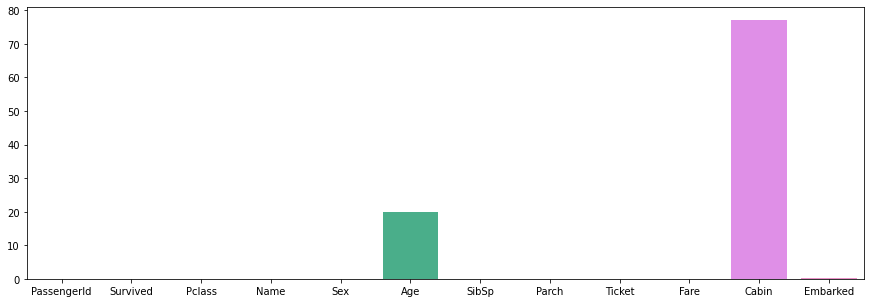

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(train_df.columns,100*train_df.isna().sum()/len(train_df))
#since 'Cabine' is more than 70% it'll be droped , 'Age' can be imputed

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


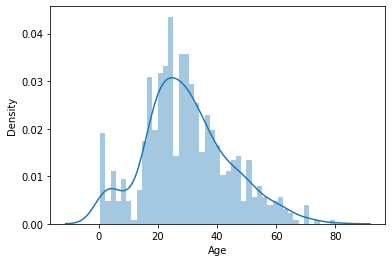

In [10]:
sns.distplot(train_df['Age'], bins=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


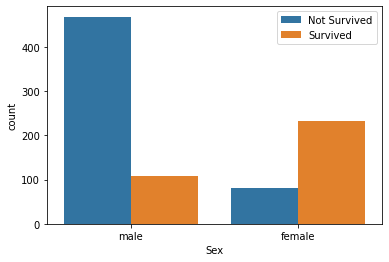

In [11]:
sns.countplot(train_df['Sex'] , hue=train_df['Survived'])
plt.legend(labels=['Not Survived' , 'Survived'])

#so Men are more likely to die than Women 

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, "['Southampton', 'Cherbourg', 'Queenstown']")

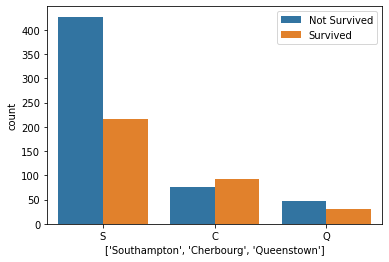

In [13]:
sns.countplot(train_df['Embarked'],hue=train_df['Survived'])
plt.legend(labels=['Not Survived' , 'Survived'])
plt.xlabel(xlabel=['Southampton' , 'Cherbourg' , 'Queenstown'])

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


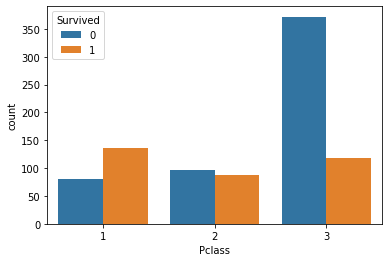

In [15]:
sns.countplot(train_df['Pclass'] , hue = train_df['Survived'])
#Looks Like downgrading the class the more the surviving chance gets low 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


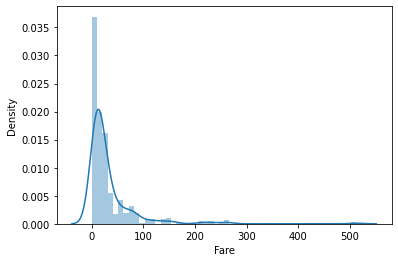

In [16]:
sns.distplot(train_df['Fare'])

#**Data Cleaning**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


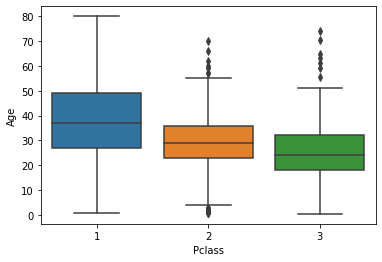

In [17]:
#check the average age by passenger class 
sns.boxplot(train_df['Pclass'] , train_df['Age'])

In [18]:
 train_df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
#passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

def age_imp (cols):
  age=cols[0]
  pclass=cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return 38
    elif pclass == 2 :
      return 29
    else: 
      return 25
  else:
     return age      

In [20]:
# apply the impution function on both train & test Data \

train_df['Age'] = train_df[['Age','Pclass']].apply(age_imp,axis=1)
test_df['Age'] = test_df[['Age' , 'Pclass']].apply(age_imp,axis=1)


In [21]:
#Drop 'Cabine' coloumn
train_df.drop('Cabin' , axis=1  , inplace=True)
test_df.drop('Cabin' , axis=1 , inplace=True)

In [22]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [23]:
#Drob the 'Name' 
train_df.drop('Name' , axis=1  , inplace=True)
test_df.drop('Name' , axis=1 , inplace=True)

In [24]:
#Drob the 'Ticket'
train_df.drop('Ticket' , axis=1  , inplace=True)
train_df.drop('PassengerId',axis=1 , inplace=True)
test_df.drop('Ticket' , axis=1 , inplace=True)

In [25]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#**Convert Categorical Feature to dummy variables**

In [26]:
sex = pd.get_dummies(train_df['Sex'] , drop_first=True)
embarked = pd.get_dummies(train_df['Embarked'] , drop_first=True)
train_df.drop(['Sex','Embarked'], axis=1 , inplace=True)
train_df = pd.concat([train_df,sex,embarked], axis=1)

In [27]:
#apply to the test data
sex = pd.get_dummies(test_df['Sex'] , drop_first=True)
embarked = pd.get_dummies(test_df['Embarked'] , drop_first=True)
test_df.drop(['Sex','Embarked'], axis=1 , inplace=True)
test_df = pd.concat([test_df,sex,embarked], axis=1)

In [28]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#**Data Preprocessing**

In [29]:
X = train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [30]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [31]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [32]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [33]:
len(X_train) , len(X_test)

(623, 268)

#**Compare the models**

In [38]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNN': KNeighborsClassifier()}

# Create function to fit and score models

def fit_score(models , x_train , x_test , y_train , y_test):

  model_scores={}

  for name , model in models.items():
    # Fit the model to the data
    model.fit(x_train,y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test,y_test)

  return model_scores

In [39]:
model_scores = fit_score(models=models,
                             x_train=X_train,
                             x_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6940298507462687,
 'LogisticRegression': 0.8171641791044776,
 'RandomForestClassifier': 0.7798507462686567}

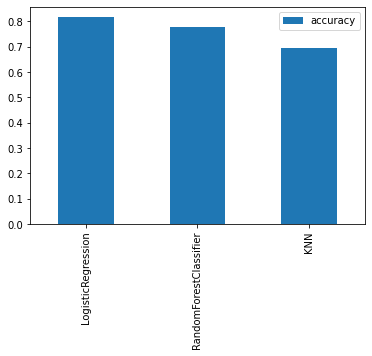

In [40]:
#Visualize models accuracy
model_compare = pd.DataFrame(model_scores , index=['accuracy'])
model_compare.T.plot.bar()

#**Tune Knn classifier with GridSearchCv**


In [41]:
#KNN parameter Grid
knn_grid = {'n_neighbors':list(range(1, 31)),
            'weights':['uniform', 'distance']}
# Instantiate the grid search model
knn_gc = GridSearchCV(KNeighborsClassifier(),
          param_grid = knn_grid,
          cv=10)
# Fit grid hyperparameter search model
knn_gc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print(knn_gc.score(X_test,y_test))

0.7164179104477612


#**Tune RandomForestClassifier with GridSearchCv**

In [46]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
rf_gcsv = GridSearchCV(RandomForestClassifier(),
                           param_grid = param_grid, 
                          cv = 5,n_jobs=-1)
#fit the grid search model
rf_gcsv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
rf_gcsv.score(X_test,y_test)

0.8171641791044776

##**Logistic Regression with GridSearchCv**

In [48]:
#logistic regression hyperprameter grid
log_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
log_gc = GridSearchCV(LogisticRegression(),
                      param_grid=log_grid,
                      cv=5,
                      verbose=True)
# Instantiate the grid search model
log_gc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [49]:
# Evaluate the model
log_gc.score(X_test,y_test)

0.8171641791044776

In [51]:
predictions = log_gc.predict(X_test)


In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [58]:
id = test_df['PassengerId']
predictions = log_gc.predict(test_df.drop('PassengerId', axis=1))
result = pd.DataFrame({ 'PassengerId' : id, 'Survived': predictions })
result.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [57]:
#It replaces the infinity values with high finite values and the nan values with numbers
test_df['Fare'] = np.nan_to_num(test_df['Fare'])


In [67]:
#writing the output in csv 
result.to_csv('titanic-predictions.csv', index = False)